In [79]:
% matplotlib inline
from pymongo import MongoClient
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import networkx as nx
import community

In [3]:
# config & connect to MongoDB
mongo_username = 'Campione'
mongo_password = 'veTRxJL29lpKWwPn'
mongo_url = 'mongodb://%s:%s@cluster0-shard-00-01-i6gcp.mongodb.net:27017/admin' % (
            mongo_username, mongo_password)
client = MongoClient(mongo_url,ssl=True,replicaSet='Cluster0-shard-0',authSource='admin')
info = client.server_info()  # Forces a call.
print(info)
print(client.database_names())

{'version': '3.4.14', 'gitVersion': 'fd954412dfc10e4d1e3e2dd4fac040f8b476b268', 'modules': ['enterprise'], 'allocator': 'tcmalloc', 'javascriptEngine': 'mozjs', 'sysInfo': 'deprecated', 'versionArray': [3, 4, 14, 0], 'openssl': {'running': 'OpenSSL 1.0.1e-fips 11 Feb 2013', 'compiled': 'OpenSSL 1.0.1e-fips 11 Feb 2013'}, 'buildEnvironment': {'distmod': 'rhel70', 'distarch': 'x86_64', 'cc': '/opt/mongodbtoolchain/v2/bin/gcc: gcc (GCC) 5.4.0', 'ccflags': '-fno-omit-frame-pointer -fno-strict-aliasing -ggdb -pthread -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -Werror -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -fno-builtin-memcmp', 'cxx': '/opt/mongodbtoolchain/v2/bin/g++: g++ (GCC) 5.4.0', 'cxxflags': '-Woverloaded-virtual -Wno-maybe-uninitialized -std=c++11', 'linkflags': '-pthread -Wl,-z,now -rdynamic -Wl,--fatal-warnings -fstack-protector-strong -fuse-ld=gold -Wl,-

In [4]:
db = client.gitdbPro

In [5]:
langs = db.langs

In [6]:
all_langs = langs.distinct('languages')

In [7]:
df = pd.DataFrame(all_langs)

In [8]:
df

,1C Enterprise,ABAP,AGS Script,AMPL,ANTLR,API Blueprint,ASP,ActionScript,Ada,Agda,...,Visual Basic,Vue,WebAssembly,XC,XS,XSLT,Xtend,Yacc,eC,xBase
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['Java']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5          30081.0
6          24825.0
7              NaN
8              NaN
9              NaN
10         49715.0
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18          1644.0
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24         31947.0
25             NaN
26          8999.0
27             NaN
28             NaN
29             NaN
           ...    
11235          NaN
11236          NaN
11237          NaN
11238          NaN
11239          NaN
11240          NaN
11241          NaN
11242          NaN
11243          NaN
11244          NaN
11245          NaN
11246          NaN
11247       5341.0
11248          NaN
11249          NaN
11250          NaN
11251          NaN
11252          NaN
11253          NaN
11254          NaN
11255       1131.0
11256       

In [10]:
df[df['Java'].notnull()]['Java']

5          30081.0
6          24825.0
10         49715.0
18          1644.0
24         31947.0
26          8999.0
33          1738.0
34         20218.0
35         57498.0
39        626490.0
42          6860.0
51        123433.0
54        202259.0
59         32912.0
60         20188.0
63          1357.0
64        100222.0
65         39669.0
66        682270.0
70       1630523.0
85        130320.0
87        850369.0
95         26626.0
98         55095.0
100       562341.0
101        26707.0
102         1476.0
105       598147.0
120         9099.0
122         1417.0
           ...    
11058     123676.0
11067       1723.0
11070     256385.0
11074      61057.0
11075       1407.0
11085     108636.0
11092      79423.0
11093     132898.0
11100      58453.0
11103      75941.0
11108     595831.0
11112      60808.0
11119      19113.0
11127     345581.0
11135      17474.0
11136      34971.0
11145      18905.0
11157      17787.0
11164       8692.0
11167       1392.0
11178     108548.0
11179       

In [11]:
# filter languages that appears >= 100 times
df_100 = df.loc[:, df.count()>=100]
df_100.head()

,Assembly,Batchfile,C,C#,C++,CMake,CSS,Cuda,Go,HTML,...,Perl,PowerShell,Python,Roff,Ruby,Rust,Shell,Swift,TypeScript,Vue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,90.0,1422.0,139546.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5942.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2670.0,NaN,337699.0,NaN
4,NaN,884.0,NaN,608042.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6109.0,NaN,NaN,NaN,NaN,3419.0,NaN,NaN,NaN


In [12]:
df_100.count()

Assembly             168
Batchfile            471
C                   1054
C#                   376
C++                  969
CMake                385
CSS                 2220
Cuda                 105
Go                   822
HTML                2932
Java                1716
JavaScript          4112
Jupyter Notebook     378
Kotlin               285
Lua                  117
Makefile            1224
Objective-C          932
PHP                  487
Perl                 137
PowerShell           164
Python              2977
Roff                 100
Ruby                 933
Rust                 175
Shell               2715
Swift                663
TypeScript           518
Vue                  536
dtype: int64

In [13]:
# filter languages that appears >= 100 times
df_50 = df.loc[:, df.count()>=50]
df_50.head()

,Assembly,Batchfile,C,C#,C++,CMake,CSS,Clojure,Cuda,Elixir,...,Rust,Scala,ShaderLab,Shell,Smarty,Swift,TeX,TypeScript,Vim script,Vue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,90.0,1422.0,139546.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2670.0,NaN,NaN,NaN,337699.0,NaN,NaN
4,NaN,884.0,NaN,608042.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3419.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_50.count()

Assembly             168
Batchfile            471
C                   1054
C#                   376
C++                  969
CMake                385
CSS                 2220
Clojure               50
Cuda                 105
Elixir                59
Emacs Lisp            55
GLSL                  88
Go                   822
Groovy                59
HTML                2932
Haskell               63
Java                1716
JavaScript          4112
Jupyter Notebook     378
Kotlin               285
Lua                  117
M4                    85
Makefile            1224
Matlab                89
Objective-C          932
Objective-C++         96
PHP                  487
Perl                 137
PowerShell           164
Python              2977
R                     80
Roff                 100
Ruby                 933
Rust                 175
Scala                 74
ShaderLab             62
Shell               2715
Smarty                77
Swift                663
TeX                   83


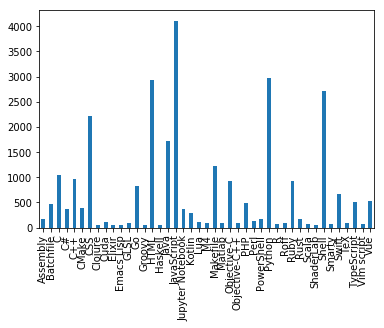

In [15]:
df_50.count().plot('bar')

       Assembly  Batchfile  C  C#  C++  CMake  CSS  Cuda  Go  HTML ...   Perl  \
0             0          0  0   0    0      0    0     0   0     0 ...      0   
1             0          0  1   1    1      0    0     0   0     0 ...      0   
2             0          0  0   0    0      0    0     0   0     1 ...      0   
3             0          0  0   0    0      0    0     0   0     0 ...      0   
4             0          1  0   1    0      0    0     0   0     0 ...      0   
5             0          0  0   0    0      0    0     0   0     0 ...      0   
6             0          0  0   0    0      0    0     0   0     0 ...      0   
7             0          0  0   0    0      0    1     0   0     1 ...      0   
8             0          0  0   0    0      0    0     0   0     0 ...      0   
9             0          0  0   0    0      0    1     0   0     1 ...      0   
10            1          0  1   1    1      1    0     0   1     1 ...      0   
11            0          0  

([<matplotlib.axis.YTick at 0x1a20092d68>,
 <a list of 28 Text yticklabel objects>)

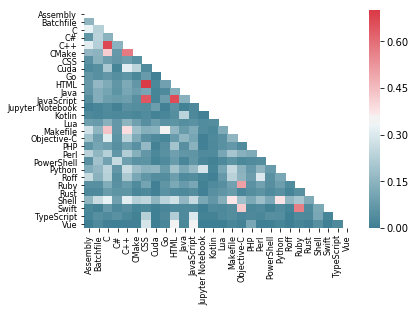

In [21]:
df_onehot = (~pd.isnull(df_100)).astype('int')
print(df_onehot)
df_overlap = df_onehot.T.dot(df_onehot)
print(df_overlap)
lang_count = df_100.count()
print(lang_count)
df_overlap_std = df_overlap.divide(np.sqrt(lang_count), axis=0).divide(np.sqrt(lang_count), axis=1)
print(df_overlap_std)

mask = np.zeros_like(df_overlap_std, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_overlap_std, cmap=sns.diverging_palette(220, 10, as_cmap=True), mask=mask, vmax=.7)
plt.xticks([x+0.5 for x in range(df_overlap_std.shape[1])], list(df_overlap_std.columns), fontsize=8)
plt.yticks([x+0.5 for x in range(df_overlap_std.shape[1])], list(df_overlap_std.columns), fontsize=8)

In [17]:
print(df_overlap_std)

                  Assembly  Batchfile         C        C#       C++     CMake  \
Assembly          1.000000   0.152863  0.327947  0.063661  0.309809  0.161213   
Batchfile         0.152863   1.000000  0.228505  0.235251  0.224994  0.150293   
C                 0.327947   0.228505  1.000000  0.146142  0.673853  0.419141   
C#                0.063661   0.235251  0.146142  1.000000  0.145790  0.076221   
C++               0.309809   0.224994  0.673853  0.145790  1.000000  0.577940   
CMake             0.161213   0.150293  0.419141  0.076221  0.577940  1.000000   
CSS               0.054036   0.139846  0.090216  0.068956  0.087953  0.055165   
Cuda              0.030117   0.044967  0.207412  0.015098  0.313504  0.238735   
Go                0.067274   0.049821  0.070907  0.044969  0.060506  0.026664   
HTML              0.075516   0.163384  0.123440  0.067621  0.121028  0.070591   
Java              0.068911   0.133479  0.104843  0.061002  0.111671  0.084891   
JavaScript        0.040907  

In [18]:
print(df_overlap_std[:1])

          Assembly  Batchfile         C        C#       C++     CMake  \
Assembly       1.0   0.152863  0.327947  0.063661  0.309809  0.161213   

               CSS      Cuda        Go      HTML ...       Perl  PowerShell  \
Assembly  0.054036  0.030117  0.067274  0.075516 ...   0.237294    0.054221   

            Python      Roff      Ruby      Rust     Shell     Swift  \
Assembly  0.125848  0.262316  0.050517  0.029161  0.156952  0.023971   

          TypeScript  Vue  
Assembly    0.016949  0.0  

[1 rows x 28 columns]


In [25]:
columns = list(df_overlap_std)
print(columns)

KeyError: 0

In [29]:
#G = nx.from_pandas_dataframe(df_overlap_std, columns, columns)
#nx.draw(G, with_labels=True)
#plt.show()
#df_graph = pd.DataFrame()
print(df_overlap_std.values)

[[ 1.          0.15286335  0.32794736  0.0636607   0.30980861  0.16121255
   0.05403595  0.03011693  0.06727434  0.07551605  0.06891098  0.04090701
   0.00793651  0.02742042  0.09272477  0.27785947  0.19459341  0.06292937
   0.23729445  0.0542208   0.12584789  0.26231569  0.05051665  0.02916059
   0.1569518   0.02397058  0.01694925  0.        ]
 [ 0.15286335  1.          0.22850469  0.23525064  0.22499416  0.15029314
   0.13984569  0.0449671   0.04982133  0.16338372  0.13347876  0.13221503
   0.01895979  0.0218352   0.07667771  0.15409363  0.09508722  0.10857464
   0.15746689  0.19069684  0.16214418  0.14284046  0.0512894   0.03134823
   0.26087151  0.00894752  0.04453971  0.03184396]
 [ 0.32794736  0.22850469  1.          0.14614151  0.67385261  0.41914143
   0.09021574  0.20741212  0.07090677  0.12344044  0.10484318  0.09270656
   0.03327002  0.03101746  0.1395349   0.43492656  0.30672228  0.09072533
   0.22894895  0.10101993  0.23936251  0.23101541  0.12806858  0.08382299
   0.32276

/Users/haki/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/haki/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/haki/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/haki/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

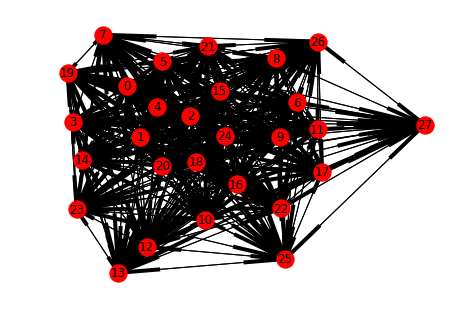

In [38]:
G = nx.from_numpy_matrix(df_overlap_std.values, parallel_edges=True,create_using=nx.MultiDiGraph())
nx.draw(G, with_labels=True)
plt.show()

In [85]:
df_graph = df_overlap_std.stack().reset_index()
df_graph.shape
df_graph = df_graph[df_graph['level_0'] != df_graph['level_1']]
df_graph = df_graph[df_graph[0] != 0]
df_graph.shape
df_graph.to_csv('all.csv')
#df_graph = df_graph[df_graph[0] > 0.3]
print(df_graph)
#df_graph.to_csv('out.csv')

        level_0           level_1         0
1      Assembly         Batchfile  0.152863
2      Assembly                 C  0.327947
3      Assembly                C#  0.063661
4      Assembly               C++  0.309809
5      Assembly             CMake  0.161213
6      Assembly               CSS  0.054036
7      Assembly              Cuda  0.030117
8      Assembly                Go  0.067274
9      Assembly              HTML  0.075516
10     Assembly              Java  0.068911
11     Assembly        JavaScript  0.040907
12     Assembly  Jupyter Notebook  0.007937
13     Assembly            Kotlin  0.027420
14     Assembly               Lua  0.092725
15     Assembly          Makefile  0.277859
16     Assembly       Objective-C  0.194593
17     Assembly               PHP  0.062929
18     Assembly              Perl  0.237294
19     Assembly        PowerShell  0.054221
20     Assembly            Python  0.125848
21     Assembly              Roff  0.262316
22     Assembly              Rub

/Users/haki/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/haki/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/haki/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/haki/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

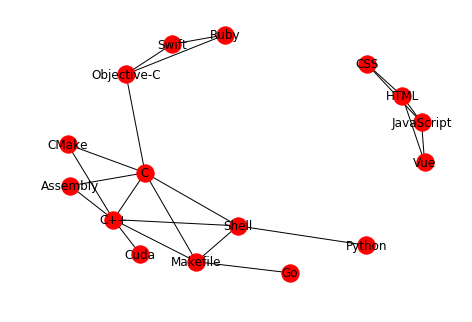

In [78]:
G = nx.from_pandas_dataframe(df_graph, 'level_0', 'level_1',[0])
nx.draw(G, with_labels=True)
#plt.figure(figsize=(20,20))
plt.axis('off')
plt.show()
#G['Vue']['Ruby'][0]